Cluster topics by their relative variations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import *
import os

# Set the environment variable OMP_NUM_THREADS to 1
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans

In [4]:
def compute_cluster(fraction_views, nb_cluster) : 
    fraction_views_clustered = fraction_views.copy()
    kmeans = KMeans(nb_cluster, n_init= 10)
    kmeans.fit(fraction_views_clustered)
    fraction_views_clustered = kmeans.labels_
    return fraction_views_clustered

In [5]:
views_en = pd.read_csv('data/Philo_en.csv')
views_en['code'] = views_en['project'].str.split('.').str[0]
views_en['subject'] = views_en['article']

views_en

,project,article,timestamp,views,code,subject
0,en.wikipedia,Absurdism,2018010100,50296,en,Absurdism
1,en.wikipedia,Absurdism,2018020100,44655,en,Absurdism
2,en.wikipedia,Absurdism,2018030100,50593,en,Absurdism
3,en.wikipedia,Absurdism,2018040100,50871,en,Absurdism
4,en.wikipedia,Absurdism,2018050100,48368,en,Absurdism
...,...,...,...,...,...,...
26216,en.wikipedia,Zurvanism,2022090100,4990,en,Zurvanism
26217,en.wikipedia,Zurvanism,2022100100,4904,en,Zurvanism
26218,en.wikipedia,Zurvanism,2022110100,4897,en,Zurvanism
26219,en.wikipedia,Zurvanism,2022120100,5414,en,Zurvanism


In [6]:
views_en['rel_diff_views'] = views_en['views'].pct_change()
views_en['rel_diff_views'].fillna(0, inplace=True)
views_en

,project,article,timestamp,views,code,subject,rel_diff_views
0,en.wikipedia,Absurdism,2018010100,50296,en,Absurdism,0.000000
1,en.wikipedia,Absurdism,2018020100,44655,en,Absurdism,-0.112156
2,en.wikipedia,Absurdism,2018030100,50593,en,Absurdism,0.132975
3,en.wikipedia,Absurdism,2018040100,50871,en,Absurdism,0.005495
4,en.wikipedia,Absurdism,2018050100,48368,en,Absurdism,-0.049203
...,...,...,...,...,...,...,...
26216,en.wikipedia,Zurvanism,2022090100,4990,en,Zurvanism,-0.028994
26217,en.wikipedia,Zurvanism,2022100100,4904,en,Zurvanism,-0.017234
26218,en.wikipedia,Zurvanism,2022110100,4897,en,Zurvanism,-0.001427
26219,en.wikipedia,Zurvanism,2022120100,5414,en,Zurvanism,0.105575


In [13]:
article_counts = views_en.groupby('article').size()
print(article_counts.unique())
#drop philosophies where incorrtect number of datapoints 
views_en = views_en[views_en['article'].isin(article_counts[article_counts == 61].index)]
print(views_en['article'].unique().shape)

[61]
(420,)


In [12]:
views_en 

,project,article,timestamp,views,code,subject,rel_diff_views
0,en.wikipedia,Absurdism,2018010100,50296,en,Absurdism,0.000000
1,en.wikipedia,Absurdism,2018020100,44655,en,Absurdism,-0.112156
2,en.wikipedia,Absurdism,2018030100,50593,en,Absurdism,0.132975
3,en.wikipedia,Absurdism,2018040100,50871,en,Absurdism,0.005495
4,en.wikipedia,Absurdism,2018050100,48368,en,Absurdism,-0.049203
...,...,...,...,...,...,...,...
26216,en.wikipedia,Zurvanism,2022090100,4990,en,Zurvanism,-0.028994
26217,en.wikipedia,Zurvanism,2022100100,4904,en,Zurvanism,-0.017234
26218,en.wikipedia,Zurvanism,2022110100,4897,en,Zurvanism,-0.001427
26219,en.wikipedia,Zurvanism,2022120100,5414,en,Zurvanism,0.105575


In [34]:
NB_CLUSTER = 50
arr = np.vstack(views_en.groupby('article')['rel_diff_views'].apply(lambda x: x.to_numpy()).to_numpy()).astype(float)
clusters1 = compute_cluster(arr, NB_CLUSTER)
clusters1
lang_clusters1 = pd.DataFrame({'Cluster_Labels': clusters1, 'Topic': views_en['article'].unique()})

for cluster_label, group in lang_clusters1.groupby('Cluster_Labels'):
    country_names = ', '.join(group['Topic'])
    print(f'Cluster {cluster_label}: {country_names}')

Cluster 0: Constructivist_epistemology, Humanistic_naturalism, Jingoism, Moral_realism, Russian_philosophy
Cluster 1: Absurdism, Philosophy_of_action, Aesthetic_Realism, African_philosophy, Agential_realism, Agnosticism, Antinomianism, Anti-realism, Anthropocentrism, Anomalous_monism, Philosophy_of_artificial_intelligence, Avicennism, Biosophy, Charvaka, Capitalism, The_Philosophy_of_Chance, Christian_philosophy, Communitarianism, Conceptualism, Cosmicism, Czech_philosophy, Discordianism, Philosophy_of_eating, Philosophy_of_economics, Philosophy_of_education, Egoism, Eliminative_materialism, Epicureanism, Epistemology, Essentialism, Ethics, Eudaimonism, Fatalism, Filial_piety, Free_will, German_philosophy, Philosophy_of_healthcare, Henotheism, Hindu_philosophy, Holism, Idealism, Ignosticism, Indian_logic, Innatism, Instrumentalism, Jewish_philosophy, Juche, Korean_philosophy, Legalism_(Chinese_philosophy), Leninism, Libertarianism_(metaphysics), Philosophy_of_linguistics, Logical_atomi

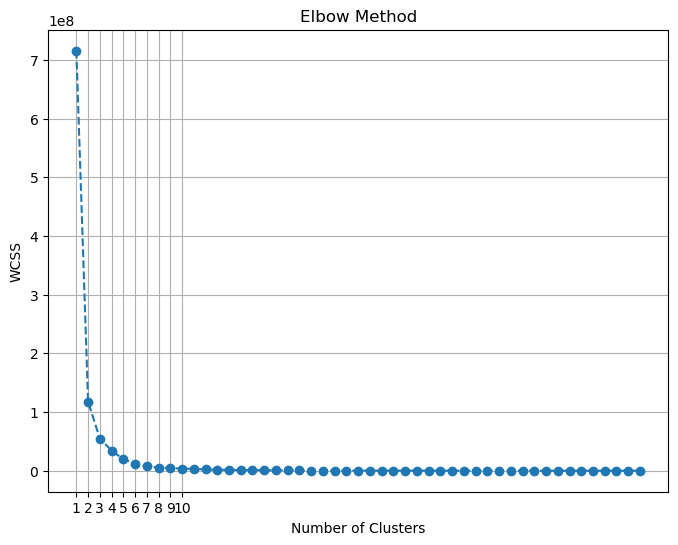

In [35]:
wcss = []
for i in range(1, 50):  # Trying different numbers of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init= 10)
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)  # Inertia is the within-cluster sum of squares

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))  # Setting x-axis ticks from 1 to 10
plt.grid()

plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

def compute_cluster(fraction_views, nb_cluster):
    fraction_views_clustered = fraction_views.copy()
    clustering = AgglomerativeClustering(n_clusters=nb_cluster)
    clustering.fit(fraction_views_clustered)
    fraction_views_clustered = clustering.labels_
    return fraction_views_clustered

# Rest of the code remains the same
NB_CLUSTER = 50
arr = np.vstack(views_en.groupby('article')['rel_diff_views'].apply(lambda x: x.to_numpy()).to_numpy()).astype(float)
clusters2 = compute_cluster(arr, NB_CLUSTER)
clusters2
lang_clusters = pd.DataFrame({'Cluster_Labels': clusters2, 'Topic': views_en['article'].unique()})

for cluster_label, group in lang_clusters.groupby('Cluster_Labels'):
    country_names = ', '.join(group['Topic'])
    print(f'Cluster {cluster_label}: {country_names}')


Cluster 0: Constructivist_epistemology, Humanistic_naturalism, Jingoism, Moral_realism, Russian_philosophy
Cluster 1: Absurdism, Philosophy_of_action, Aesthetic_Realism, African_philosophy, Agential_realism, Agnosticism, Antinomianism, Anti-realism, Anthropocentrism, Anomalous_monism, Philosophy_of_artificial_intelligence, Avicennism, Biosophy, Charvaka, Capitalism, The_Philosophy_of_Chance, Christian_philosophy, Communitarianism, Conceptualism, Cosmicism, Czech_philosophy, Discordianism, Philosophy_of_eating, Philosophy_of_economics, Philosophy_of_education, Egoism, Eliminative_materialism, Epicureanism, Epistemology, Essentialism, Ethics, Eudaimonism, Fatalism, Filial_piety, Free_will, German_philosophy, Philosophy_of_healthcare, Henotheism, Hindu_philosophy, Holism, Idealism, Ignosticism, Indian_logic, Innatism, Instrumentalism, Jewish_philosophy, Juche, Korean_philosophy, Legalism_(Chinese_philosophy), Leninism, Libertarianism_(metaphysics), Philosophy_of_linguistics, Logical_atomi

In [37]:
from sklearn.metrics import adjusted_rand_score

# Calculate the ARI
ari = adjusted_rand_score(clusters1, clusters2)

# Print the ARI
print(f"The Adjusted Rand Index between the two clustering approaches is: {ari}")


The Adjusted Rand Index between the two clustering approaches is: 1.0
